<a href="https://colab.research.google.com/github/milanpavikevik/GenreClassifier/blob/FINAL/data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [ ]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')
%pylab inline
import os
import glob
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import pandas as pd

# Audio
import librosa.display

# Scikit learn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix                   
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


# Data read

In [ ]:
INPUT_DIR=f'/content/drive/My Drive/Songs/all_songs/'
genres = ['classical','hip_hop_rap','metal','pop','turbofolk','techno','rock','narodni','jazz']

In [ ]:
"""
=== Iterate through all the songs ===
=== Label them with respect to the file they are located in ===
"""
dataset = []
for genre in genres:
  directory = INPUT_DIR + genre + '/**'
  for filename in glob.iglob(directory):
    if os.path.exists(filename):
        label = genre
        duration = librosa.get_duration(filename=filename)
        print('label',label,'duration',duration)
        # skip audio smaller than 3 secs
        if duration>=65 and duration <=600:
            slice_size = 5
            initial_offset = 60
            iterations = 3
            print ('song: ',filename,'initial_offset: ',initial_offset,'iterations: ',iterations,'duration: ',duration)
            for i in range(iterations):
                offset = initial_offset + i*(slice_size-1)
                if (label=="classical"):
                    dataset.append({
                        "filename": filename,
                        "label": "classical",
                        "offset": offset
                        })
                elif (label == 'techno'):
                    dataset.append({
                        "filename": filename,
                        "label": "techno",
                        "offset": offset
                        })
                elif (label == 'hip_hop_rap'):
                    dataset.append({
                      "filename": filename,
                      "label": "hip_hop_rap",
                      "offset": offset
                      })
                elif (label == 'metal'):
                    dataset.append({
                      "filename": filename,
                      "label": "metal",
                      "offset": offset
                      })
                elif (label == 'pop'):
                    dataset.append({
                      "filename": filename,
                      "label": "pop",
                      "offset": offset
                      })
                elif (label == 'turbofolk'):
                    dataset.append({
                      "filename": filename,
                      "label": "turbofolk",
                      "offset": offset
                      })
                elif (label == 'narodni'):
                    dataset.append({
                      "filename": filename,
                      "label": "narodni",
                      "offset": offset
                      })
                elif (label == 'jazz'):
                    dataset.append({
                      "filename": filename,
                      "label": "jazz",
                      "offset": offset
                      })
                elif (label == 'rock'):
                    dataset.append({
                      "filename": filename,
                      "label": "rock",
                      "offset": offset
                      })

label classical duration 298.0
song:  /content/drive/My Drive/Songs/all_songs/classical/Frédéric Chopin - Nocturne Op. 27 No. 1 (Piano Solo).mp3 initial_offset:  60 iterations:  3 duration:  298.0
label classical duration 177.0
song:  /content/drive/My Drive/Songs/all_songs/classical/Antonio Vivaldi- The Four Seasons- Summer- Presto.mp3 initial_offset:  60 iterations:  3 duration:  177.0
label classical duration 263.3
song:  /content/drive/My Drive/Songs/all_songs/classical/Mussorgsky - Pictures at an Exhibition - The Old Castle.mp3 initial_offset:  60 iterations:  3 duration:  263.3
label classical duration 324.7
song:  /content/drive/My Drive/Songs/all_songs/classical/(HD) Beethoven "Sonata Pathétique"- 2nd mvt  Adagio cantabile.mp3 initial_offset:  60 iterations:  3 duration:  324.7
label classical duration 459.6
song:  /content/drive/My Drive/Songs/all_songs/classical/Saint-Saëns - Organ Symphony, Finale!!!.mp3 initial_offset:  60 iterations:  3 duration:  459.6
label classical

# Preprocessing

In [ ]:
#Fast Fourier Transform
import scipy
def fft_plot(audio,sampling_rate,label):
  """
  Plot the FFT signals of the audio

  :param audio:(audio) one sample of audio data (usually mp3 format)
  :param sampling_rate:(int) the frequency of sampling the audio
  :param label:(string) the class of the observed audio
  """
  n = len(audio)
  T = 1/sampling_rate
  yf=scipy.fft(audio)
  xf=np.linspace(0,1.0/(2.0*T),int(n/2))
  fig,ax = plt.subplots()
  ax.plot(xf,2.0/n* np.abs(yf[:n//2]))
  plt.grid()
  plt.xlabel('Frequency ------->')
  plt.ylabel('Magnitude')
  plt.title(label)
  plt.show()


#Extract MFCC from spectogram
def extract_features(audio_path,offset):

    """
    Extract features that characterize the audio

    :param audio:(audio) one sample of audio data (usually mp3 format)
    :param offset:(int) start reading after this much seconds

    :return vector of features for audio
    """

    y, sr = librosa.load(audio_path, offset=offset, duration=4.5)

    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    vector = np.empty
    vector = np.append(vector, np.mean(chroma_stft))
    vector = np.append(vector, np.mean(spec_cent))
    vector = np.append(vector,np.mean(spec_bw))
    vector = np.append(vector,np.mean(rolloff))
    vector = np.append(vector,np.mean(zcr))
    for e in mfcc:
            vector = np.append(vector,np.mean(e))

    vector = np.delete(vector,0,0)


    return vector


In [ ]:
# shape and info about the dataset
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 1610 to 1126
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1944 non-null   object
 1   label     1944 non-null   object
 2   offset    1944 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 60.8+ KB


/content/drive/My Drive/Songs/all_songs/turbofolk/Zbog tebe.mp3
/content/drive/My Drive/Songs/all_songs/metal/Marilyn Manson - Sweet Dreams (Are Made Of This) (Alt. Version).mp3
/content/drive/My Drive/Songs/all_songs/electronic/Justin Bieber - What Do You Mean# (Official Music Video).mp3
/content/drive/My Drive/Songs/all_songs/opera/Offenbach - Orpheus in the Underworld: Infernal Galop (Can Can) [HQ].mp3
/content/drive/My Drive/Songs/all_songs/pop/YUNGBLUD - original me ft. dan reynolds of imagine dragons (Official Music Video).mp3
/content/drive/My Drive/Songs/all_songs/rock/rock_Snow Patrol - Chasing Cars (Official Video).mp3
/content/drive/My Drive/Songs/all_songs/hip_hop_rap/Pop Smoke ft. Lil Baby, DaBaby "For The Night" (Music Video).mp3
/content/drive/My Drive/Songs/all_songs/jazz/jazz_Cannonball Adderley - One for Daddy-O.mp3
/content/drive/My Drive/Songs/all_songs/techno/Ian Van Dahl - Castles In The Sky.mp3
/content/drive/My Drive/Songs/all_songs/narodni/narodni_45.mp3
/conte

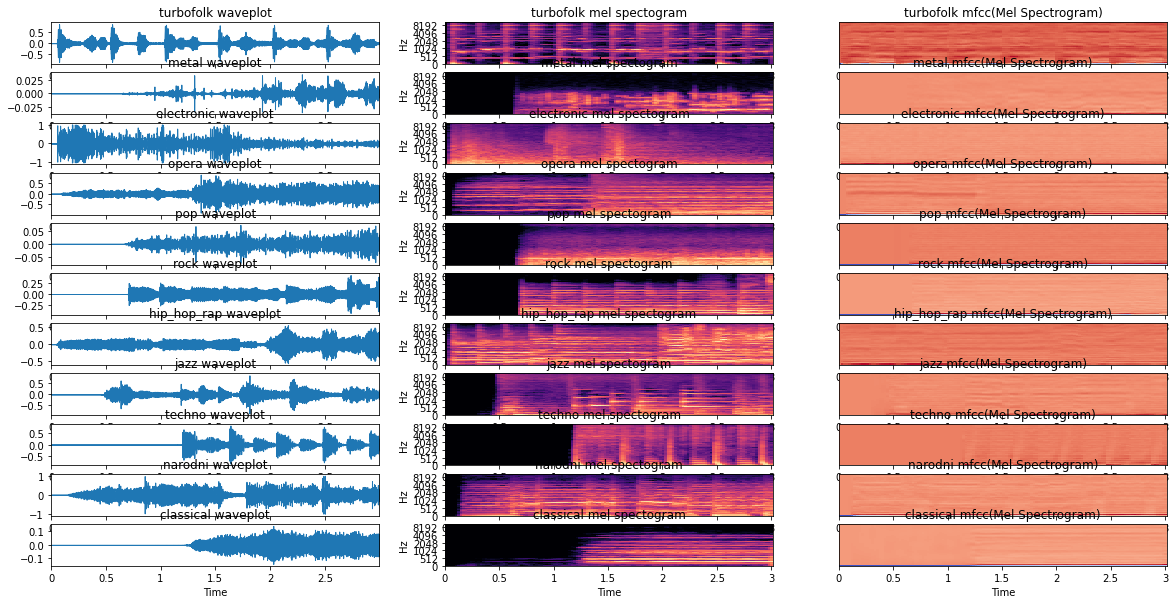

In [ ]:
# Visualize the Mel Spectograms for Random Samples from each class
plt.figure(figsize=(20,10))
idx = 0
for label in dataset.label.unique():    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[33], duration=3)
    print(dataset[dataset.label==label].filename.iloc[33])
    
    # Wave plot
    idx+=1
    plt.subplot(11, 3, idx)
    plt.title("%s waveplot" % label)
    librosa.display.waveplot(y, sr=sr)

    # Mel Spectrogram
    idx+=1
    plt.subplot(11, 3, idx)
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("%s mel spectogram" % label)

    # MFCC (Mel spectrogram)
    idx+=1
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    plt.subplot(11, 3, idx)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc(Mel Spectrogram)" % label)
plt.show()

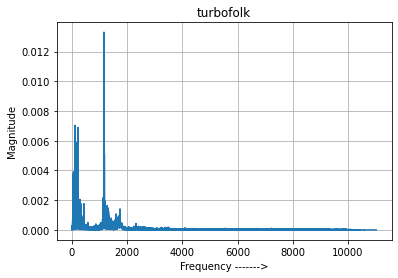

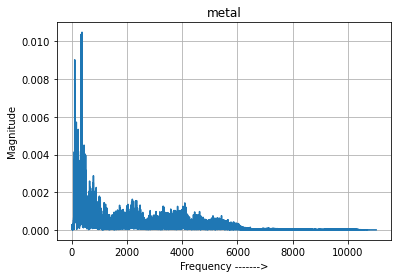

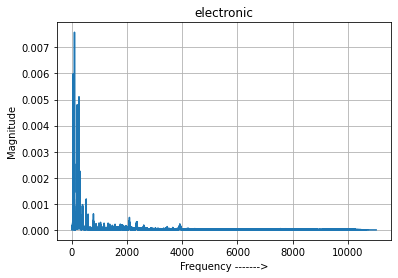

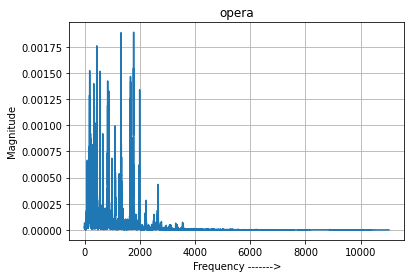

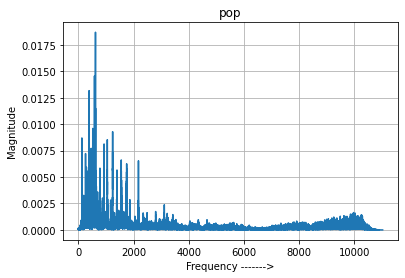

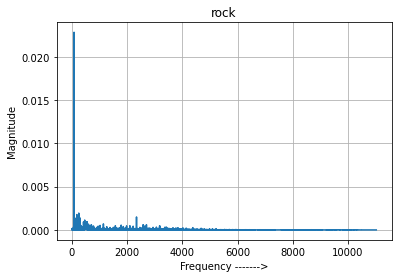

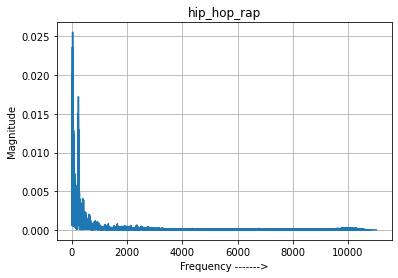

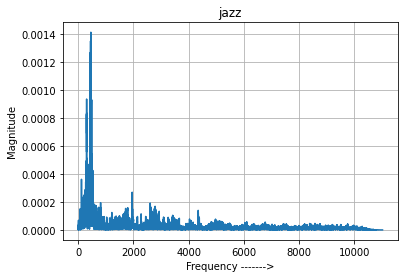

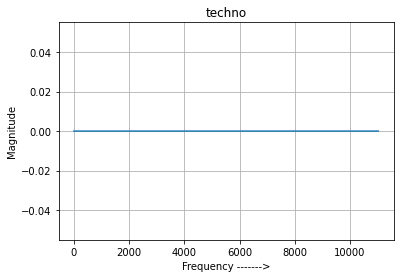

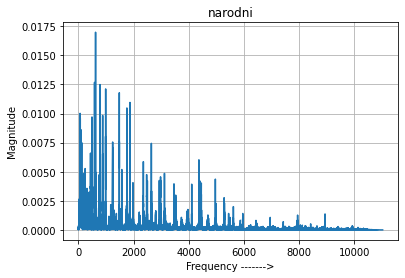

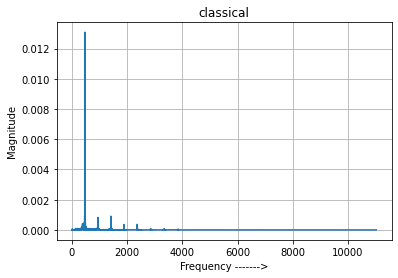

In [ ]:
# Plot the signals in Frequency Domains using FFT
for label in dataset.label.unique():
   # plt.subplot(11, 3, idx)    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[15], duration=3)
    fft_plot(y,sr,label)

In [ ]:
# Find the samples that are empty e.g. have no frequencies and information
nuli = []
for i in range(649,len(dataset)):
  y,sr = librosa.load(dataset.filename.iloc[i], duration=3)
  if y.any() == 0:
    nuli.append(i)

KeyboardInterrupt: ignored

In [ ]:
# drop the samples that have zero frequencies used
dataset = dataset.drop(index=nuli)

In [ ]:
len(dataset)

1894

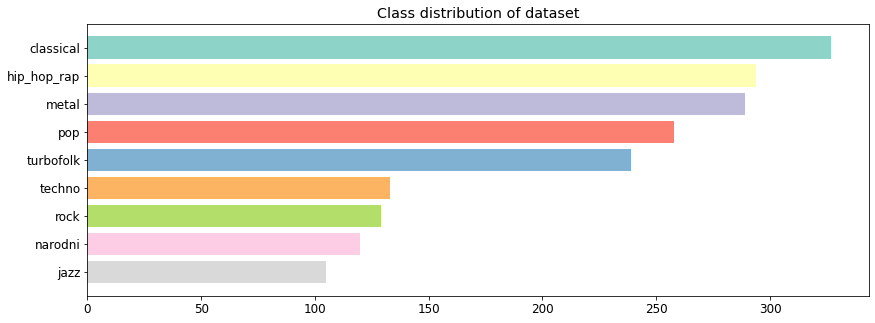

In [ ]:
# Plot the class distribution of the dataset
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 5)
matplotlib.rcParams['font.size'] = 12
from matplotlib import pyplot as plt

num_classes = 9
class_counts = dataset.label.value_counts()
cmap = plt.cm.get_cmap(plt.cm.Set3, 10)
colors = [cmap(i) for i in range(num_classes)]
plt.barh(range(num_classes)[::-1], class_counts, tick_label=genres,
         color=colors)
plt.title('Class distribution of dataset')
plt.show()